In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


# The dataset given below is supervised learning, where a input data is provided to the model along with the output. The goal of supervised learning is to train the model so that it can predict the output when it is given new data.

In [2]:
data=pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Step 1:
# The first step is to find the null values given in the data.        

In [4]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Step 2:
# Since there are no null values in the given data, we proceed to step 3.
# Incase if there are any null values, we replace it with 0 or any other number or variable satisfying the given data. For example data.x=data.x.fillna(0), where x is an imaginary column.

In [5]:
data.shape

(200, 6)

# Step 3:
# We drop the drug column as we have to predict which drug the patient needs.

In [6]:
x=data.drop(columns=['Drug'])
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


# Step 4:
# Assign a different variable y in order to predict the type of drugs suitable for a person.

In [7]:
y=data.Drug
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

# Step 5:
# We split the data at train and test, where we first train the x data and the prediction will be prevailed in the testing part. The test we have assumed here to be 0.20, which means 20% of the data from the testing part and 80% of the data is taken from the training part.

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [9]:
x_train.shape

(160, 5)

In [10]:
y_train.shape

(160,)

In [11]:
x_test.shape

(40, 5)

# Step 6:
# Nominal data: It is the data that can be labelled or classified into mutually exclusive categories within a variable.
# Ordinal data: It is a categorical, statistical data type where the variables have natural and ordered categories.

In [12]:
x.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [13]:
nom_cols=[2]
ord_cols=[1,3]

# Step 7:
# One Hot Encoder: A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1

# Ordinal Encoder: In ordinal encoding, each unique category value is assigned an integer value.
# For example, “red” is 1, “green” is 2, and “blue” is 3.
# This is called an ordinal encoding or an integer encoding and is easily reversible. 

In [14]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans=make_column_transformer((OneHotEncoder(sparse='false'),nom_cols),(OrdinalEncoder(),ord_cols),
                                                         remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse='false'),
                                 [2]),
                                ('ordinalencoder', OrdinalEncoder(), [1, 3])])

# Make Column Transformer: This is a shorthand for the ColumnTransformer constructor; it does not require, and does not permit, naming the transformers.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
algorithm=KNeighborsClassifier(n_neighbors=11)
algorithm

KNeighborsClassifier(n_neighbors=11)

# K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


In [16]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(trans,algorithm)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 3])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

# 'make_pipeline' is a utility function that is a shorthand for constructing pipelines. It takes a variable number of estimates and returns a pipeline by filling the names automatically.

In [17]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 3])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

# We fit the pipe into the x_train and y_train data.

In [18]:
pred=pipe.predict(x_test)
pred

array(['drugX', 'drugA', 'DrugY', 'drugB', 'drugX', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'drugA', 'drugA', 'drugX',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'drugA', 'drugA', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'drugA', 'drugX', 'drugA', 'drugX', 'drugA', 'drugX',
       'drugB', 'drugA', 'drugX', 'DrugY', 'DrugY'], dtype=object)

# Since we have done the training part, we now move on to predict the testing part which is the x_test.Here the predicted value is based on the data we have taken for training and testing and the algorithms that are used in it.

In [19]:
y_test                                # y_test is the actual value of the data.

138    drugB
129    drugX
121    DrugY
158    drugC
84     drugC
130    DrugY
105    drugX
178    DrugY
120    DrugY
77     DrugY
58     drugX
91     DrugY
146    drugX
45     drugX
25     DrugY
192    DrugY
13     DrugY
30     drugX
155    drugC
40     DrugY
193    drugC
33     DrugY
100    drugA
7      drugC
47     drugC
154    DrugY
136    drugB
9      DrugY
165    DrugY
162    drugX
191    drugA
112    drugX
86     drugX
82     drugC
56     drugB
145    drugX
3      drugX
102    drugC
134    DrugY
4      DrugY
Name: Drug, dtype: object

# Now we find out the accuracy with respect to the predicted value and the actual value (y_test) of the particular drug type.

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)*100

50.0

# The predicted value is 70.0 which means 70% of the drug type is found to be correct and rest 30% is found to be incorrect.
# Note: No data gives you 100% accuracy as it is irrelevant and it is impossible to accurate values of the given data.

<AxesSubplot:xlabel='Drug', ylabel='Count'>

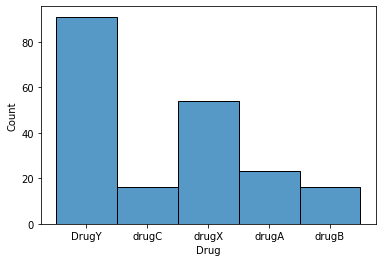

In [21]:
import seaborn as sns
sns.histplot(data.Drug)

# Random Over Sampler: Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.
# Since the drug type is not equally distributed we try oversample it in order to make equal number of samples in the respective drug.Since we are making only changes to the drug type we apply fit_resample() function.

In [22]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
o_x,o_y=over.fit_resample(x,y)
o_y.value_counts()

DrugY    91
drugC    91
drugX    91
drugA    91
drugB    91
Name: Drug, dtype: int64

# SMOTE: Synthetic Minority Oversampling Technique
# SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.
# We import make_pipeline of the same library since we use SMOTE under the imblearn library.

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
s=SMOTE()
n_pipe=make_pipeline(trans,s,algorithm)
n_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 3])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [24]:
n_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse='false'),
                                                  [2]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [1, 3])])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [25]:
pred_n=n_pipe.predict(x_test)
pred_n

array(['drugC', 'drugA', 'drugC', 'drugB', 'drugC', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'drugA', 'drugA', 'drugX',
       'DrugY', 'drugB', 'DrugY', 'drugX', 'drugC', 'DrugY', 'drugB',
       'DrugY', 'drugA', 'drugC', 'drugB', 'DrugY', 'drugC', 'DrugY',
       'DrugY', 'drugA', 'drugC', 'drugC', 'drugC', 'drugA', 'drugX',
       'drugB', 'drugC', 'drugC', 'DrugY', 'DrugY'], dtype=object)

In [26]:
accuracy_score(pred_n,y_test)*100

52.5

# Plot Confusion Matrix: The confusion matrix is a 2 dimensional array comparing predicted category labels to the true label. For binary classification, these are the True Positive, True Negative, False Positive and False Negative categories.

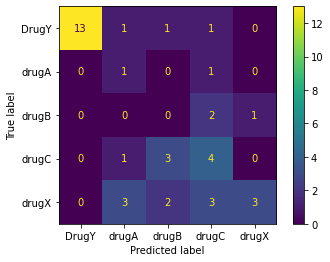

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(n_pipe,x_test,y_test)

# Lets predict the drug type the person needs with respect to his/her assesment.

In [28]:
import numpy as np
new=np.array([51,'F','LOW','HIGH',20.000]).reshape(1,5)
pipe.predict(new)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


array(['DrugY'], dtype=object)

In [29]:
new_1=np.array([32,'M','NORMAL','HIGH',10.511]).reshape(1,5)
pipe.predict(new_1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


array(['drugA'], dtype=object)